In [72]:
pip install beautifulsoup4 pandas

In [73]:
#import required library
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import re

In [74]:
#define the url that is going to be scraped
url = 'https://www.amazon.it/gp/bestsellers/electronics/473246031/ref=zg_bs_nav_ce_3_1497228031'

In [75]:
#send request to scrape data from the url
request = Request(url, headers={'User-agent': 'Mozilla/5.0'})
html = urlopen(request)
soup = BeautifulSoup(html, 'html.parser')
#get every url in Amazon bestsellers
urls = []
for a_href in soup.find_all("a", class_ = "a-link-normal",tabindex = -1, href=True):
    urls.append(a_href["href"])
string = 'https://www.amazon.it'
urls = [string + x for x in urls]

In [76]:
centerCol = []
rightCol = []
promo = []
asin = []
for url in urls:
    request1 = Request(url, headers={'User-agent': 'Mozilla/5.0'})
    html1 = urlopen(request1)
    soup1 = BeautifulSoup(html1, 'html.parser')
    centerCol.append(soup1.find('div', id = "centerCol"))
    promo.append(soup1.find('span', class_ = "a-offscreen").get_text(strip=True))#.replace('€', '').replace(',', '.')
    asin.append(soup1.find('input', {'name': 'ASIN'}).get('value'))
    #check the location that is missing the value
    #if promo:
    #    print(promo)
    #else:
    #    print(0)
    rightCol.append(soup1.find('div', id = "rightCol"))
    #details.append(soup1.find('div', id = "detailBulletsWrapper_feature_div"))

In [77]:
title = []
for titles in centerCol:
    title.append(titles.find('span', id = "productTitle").get_text(strip=True))

In [78]:
promo = [i.replace('€', '').replace('.','').replace(',','.') for i in promo]
promo = [float(x) for x in promo]

In [79]:
rank = list(range(1,31))
d = {'Rank': rank, 'Title': title, 'price': promo, 'ASIN': asin
    }#, 'Seller': seller, 'price': price, 'URL': urls}#, 'price': price
df = pd.DataFrame(data=d)
df = df[~df.Title.str.contains('Xiaomi')]
df = df[df.price > 70]
df

,Rank,Title,price,ASIN
1,2,"Samsung Galaxy A22 5G Smartphone 6,6 Pollici ,...",155.59,B0937LGYKD
2,3,"Samsung Galaxy A52s 5G Smartphone, Display Inf...",267.49,B09BRFHPQP
3,4,Apple iPhone 11 (128GB) - nero,579.00,B08L6Z31C1
5,6,"Samsung Galaxy A32 5G - Smartphone 128GB, 4GB ...",197.00,B08TB23P5B
6,7,"Samsung Galaxy A53 5G Smartphone Android, Disp...",300.89,B09SHV78TN
7,8,"Samsung Galaxy A52s 5G Smartphone, Display Inf...",292.00,B09JSZTY3D
9,10,"Samsung Galaxy A52 Smartphone, Display Infinit...",232.89,B08VZGJSY7
10,11,"realme 8i Smartphone, realme X processore Medi...",158.84,B09FPRRL7G
11,12,"OPPO Find X3 Neo Smartphone 5G, Qualcomm865, D...",399.99,B07KVWBTM8
12,13,"Samsung Galaxy A52 Smartphone, Display Infinit...",232.50,B08WLWSQXJ


In [80]:
df.to_excel (r'C:\Users\baijinpeng\Desktop\意大利线上竞争.xlsx', index = False, header=True)

In [81]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
from sklearn import linear_model
from scipy.stats import linregress
df_competition = pd.read_excel(r'C:\Users\baijinpeng\Downloads\意大利线上竞争 (1).xlsx')
df_competition = df_competition.drop(['Discount','RRP'],axis = 1)
df_competition

,Week,Day,Brand,PDT,SPEC,Promo,Rank,Description
0,W16,2022-04-21,Samsung,Galaxy A22 5G,4+64,161.90,2,"6,6 Pollici , Display Infinity-V FHD+, Telefon..."
1,W16,2022-04-21,Samsung,Galaxy A52s 5G,6+128,276.90,4,"Display Infinity-O FHD+ da 6,5 pollici, 6GB RA..."
2,W16,2022-04-21,Motorola,Moto g60s,6+128,199.90,10,"(Quad Camera 64 MP, Display FullHD+ 6.8"" 120 H..."
3,W16,2022-04-21,Samsung,Galaxy A52,6+128,239.89,12,"Display Infinity-O FHD+ da 6,5 pollici, 6 GB R..."
4,W16,2022-04-21,Apple,iPhone 13,128,829.00,14,Azzurro
...,...,...,...,...,...,...,...,...
542,W21,2022-05-27,Realme,8i,4+128,158.84,19,"realme 8i Smartphone, realme X processore Medi..."
543,W21,2022-05-27,OPPO,Find X3 Neo,12+256,399.99,20,"OPPO Find X3 Neo Smartphone 5G, Qualcomm865, D..."
544,W21,2022-05-27,Apple,iPhone 13 Pro,512,1347.50,21,Apple iPhone 13 Pro (512 GB) - Azzurro Sierra
545,W21,2022-05-27,Samsung,Galaxy A52 5G,6+128,232.50,22,"Samsung Galaxy A52 Smartphone, Display Infinit..."


In [82]:
Galaxy_A22_5G = df_competition[(df_competition["PDT"] == "Galaxy A22 5G") & (df_competition["SPEC"] == "4+64")]
#Galaxy_A22_5G = Galaxy_A22_5G[Galaxy_A22_5G["SPEC"] == "4+64"]
Galaxy_A52s_5G = df_competition[(df_competition["PDT"] == "Galaxy A52s 5G") & (df_competition["SPEC"] == "6+128")]
#Galaxy_A52s_5G = Galaxy_A52s_5G[Galaxy_A52s_5G["SPEC"] == "6+128"]
GT_Master_Edition6128 = df_competition[(df_competition["PDT"] == "GT Master Edition") & (df_competition["SPEC"] == "6+128")]
GT_Master_Edition8256 = df_competition[(df_competition["PDT"] == "GT Master Edition") & (df_competition["SPEC"] == "8+256")]
#GT_Master_Edition = GT_Master_Edition[GT_Master_Edition["SPEC"] == "6+128"]
moto_g60s = df_competition[df_competition["PDT"] == "Moto g60s"]
#moto_g60s = moto_g60s[moto_g60s["SPEC"] =="6+128"]
A54s = df_competition[df_competition["PDT"] == "A54s"]
S20_FE = df_competition[df_competition["PDT"] == "Galaxy S20 FE"]
Galaxy_A52 = df_competition[df_competition["PDT"] == "Galaxy A52"]
Galaxy_A12 = df_competition[df_competition["PDT"] == "Galaxy A12"]
Galaxy_M52 = df_competition[df_competition["PDT"] == "Galaxy M52 5G"]
HONOR_50_5G = df_competition[df_competition["PDT"] == "50 5G"]
GT_NEO_2_12256 = df_competition[(df_competition["PDT"] == "GT Neo 2") & (df_competition["SPEC"] == "12+256")] 
Galaxy_A53 = df_competition[df_competition["PDT"] == "Galaxy A53 5G"]
OPPO_A94 = df_competition[df_competition["PDT"] == "A94 5G"]
A32_5G = df_competition[df_competition["PDT"] == "Galaxy A53 5G"]

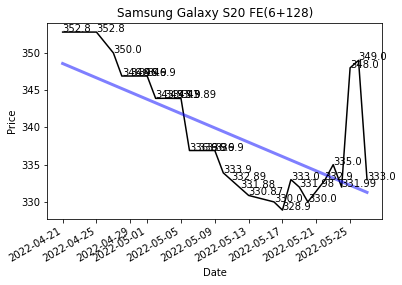

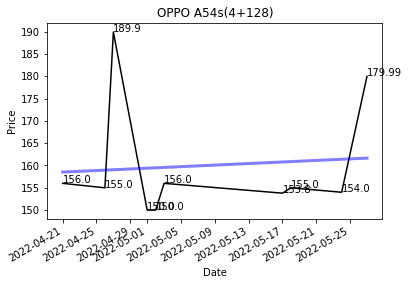

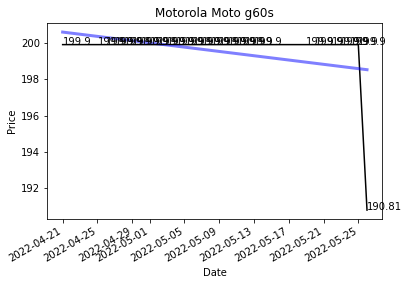

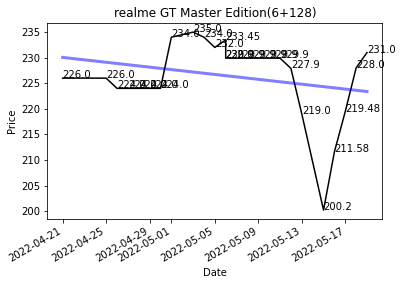

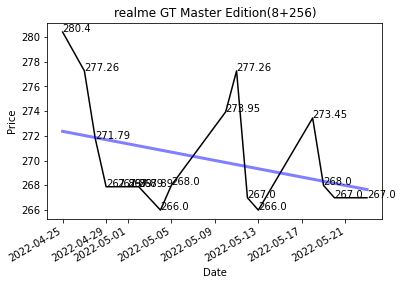

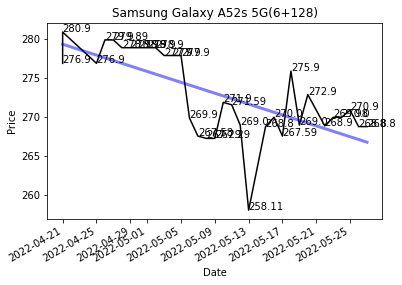

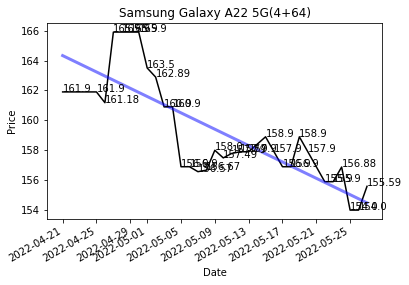

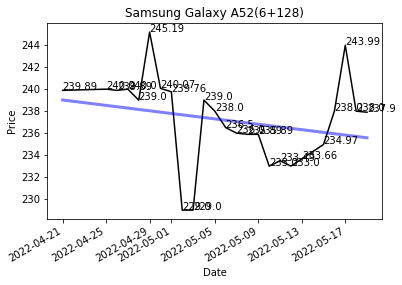

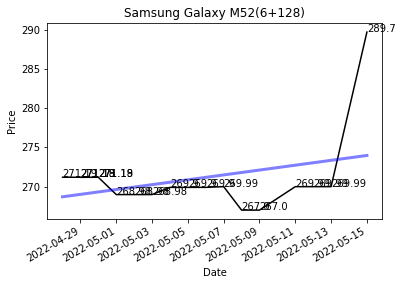

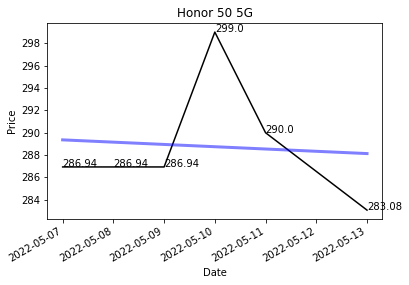

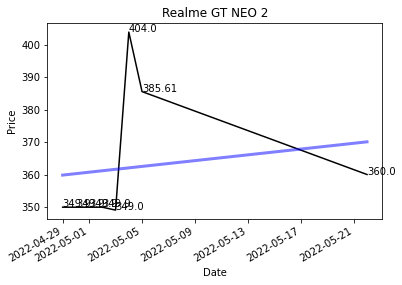

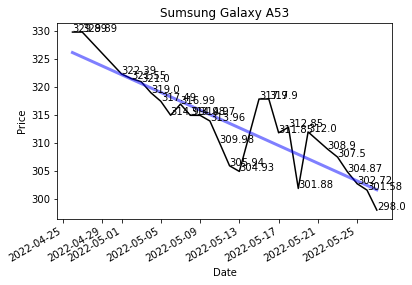

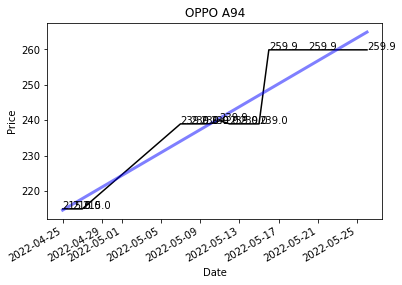

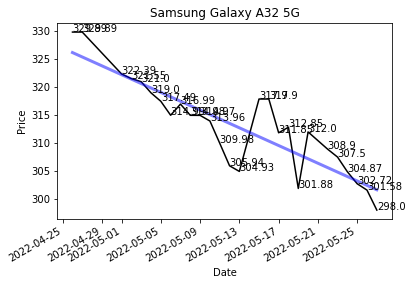

In [83]:
data_time_S20 = np.asarray(S20_FE["Day"])
data_count_S20 = np.asarray(S20_FE["Promo"])
data_time_A54s = np.asarray(A54s["Day"])
data_count_A54s = np.asarray(A54s["Promo"])
data_time_g60s = np.asarray(moto_g60s["Day"])
data_count_g60s = np.asarray(moto_g60s["Promo"])
data_time_GT_master6128 = np.asarray(GT_Master_Edition6128["Day"])
data_count_GT_master6128 = np.asarray(GT_Master_Edition6128["Promo"])
data_time_GT_master8256 = np.asarray(GT_Master_Edition8256["Day"])
data_count_GT_master8256 = np.asarray(GT_Master_Edition8256["Promo"])
data_time_A52s = np.asarray(Galaxy_A52s_5G["Day"])
data_count_A52s = np.asarray(Galaxy_A52s_5G["Promo"])
data_time_A22 = np.asarray(Galaxy_A22_5G["Day"])
data_count_A22 = np.asarray(Galaxy_A22_5G["Promo"])
data_time_A52 = np.asarray(Galaxy_A52["Day"])
data_count_A52 = np.asarray(Galaxy_A52["Promo"])
data_time_M52 = np.asarray(Galaxy_M52["Day"])
data_count_M52 = np.asarray(Galaxy_M52["Promo"])
data_time_50_5G = np.asarray(HONOR_50_5G["Day"])
data_count_50_5G = np.asarray(HONOR_50_5G["Promo"])
data_time_GT_NEO_2_12256 = np.asarray(GT_NEO_2_12256["Day"])
data_count_GT_NEO_2_12256 = np.asarray(GT_NEO_2_12256["Promo"])
data_time_Galaxy_A53 = np.asarray(Galaxy_A53["Day"])
data_count_Galaxy_A53 = np.asarray(Galaxy_A53["Promo"])
data_time_OPPO_A94 = np.asarray(OPPO_A94["Day"])
data_count_OPPO_A94 = np.asarray(OPPO_A94["Promo"])
data_time_A32_5G = np.asarray(A32_5G["Day"])
data_count_A32_5G = np.asarray(A32_5G["Promo"])

df_S20 = pd.DataFrame({'time': data_time_S20, 'count': data_count_S20})
df_S20.time = pd.to_datetime(df_S20.time)
df_A54s = pd.DataFrame({'time': data_time_A54s, 'count': data_count_A54s})
df_A54s.time = pd.to_datetime(df_A54s.time)
df_g60s = pd.DataFrame({'time': data_time_g60s, 'count': data_count_g60s})
df_g60s.time = pd.to_datetime(df_g60s.time)
df_GT_master6128 = pd.DataFrame({'time': data_time_GT_master6128, 'count': data_count_GT_master6128})
df_GT_master6128.time = pd.to_datetime(df_GT_master6128.time)
df_GT_master8256 = pd.DataFrame({'time': data_time_GT_master8256, 'count': data_count_GT_master8256})
df_GT_master8256.time = pd.to_datetime(df_GT_master8256.time)
df_A52s = pd.DataFrame({'time': data_time_A52s, 'count': data_count_A52s})
df_A52s.time = pd.to_datetime(df_A52s.time)
df_A22 = pd.DataFrame({'time': data_time_A22, 'count': data_count_A22})
df_A22.time = pd.to_datetime(df_A22.time)
df_A52 = pd.DataFrame({'time': data_time_A52, 'count': data_count_A52})
df_A52.time = pd.to_datetime(df_A52.time)
df_M52 = pd.DataFrame({'time': data_time_M52, 'count': data_count_M52})
df_M52.time = pd.to_datetime(df_M52.time)
df_50_5G = pd.DataFrame({'time': data_time_50_5G, 'count': data_count_50_5G})
df_50_5G.time = pd.to_datetime(df_50_5G.time)
df_GT_NEO_2_12256 = pd.DataFrame({'time': data_time_GT_NEO_2_12256, 'count': data_count_GT_NEO_2_12256})
df_GT_NEO_2_12256.time = pd.to_datetime(df_GT_NEO_2_12256.time)
df_Galaxy_A53 = pd.DataFrame({'time': data_time_Galaxy_A53, 'count': data_count_Galaxy_A53})
df_Galaxy_A53.time = pd.to_datetime(df_Galaxy_A53.time)
df_OPPO_A94 = pd.DataFrame({'time': data_time_OPPO_A94, 'count': data_count_OPPO_A94})
df_OPPO_A94.time = pd.to_datetime(df_OPPO_A94.time)
df_A32_5G = pd.DataFrame({'time': data_time_A32_5G, 'count': data_count_A32_5G})
df_A32_5G.time = pd.to_datetime(df_A32_5G.time)

regr_S20 = linear_model.LinearRegression()
regr_S20.fit(df_S20.time.values.reshape(-1, 1), df_S20['count'].values.reshape(-1, 1))
regr_A54s = linear_model.LinearRegression()
regr_A54s.fit(df_A54s.time.values.reshape(-1, 1), df_A54s['count'].values.reshape(-1, 1))
regr_g60s = linear_model.LinearRegression()
regr_g60s.fit(df_g60s.time.values.reshape(-1, 1), df_g60s['count'].values.reshape(-1, 1))
regr_GT_master6128 = linear_model.LinearRegression()
regr_GT_master6128.fit(df_GT_master6128.time.values.reshape(-1, 1), df_GT_master6128['count'].values.reshape(-1, 1))
regr_GT_master8256 = linear_model.LinearRegression()
regr_GT_master8256.fit(df_GT_master8256.time.values.reshape(-1, 1), df_GT_master8256['count'].values.reshape(-1, 1))
regr_A52s = linear_model.LinearRegression()
regr_A52s.fit(df_A52s.time.values.reshape(-1, 1), df_A52s['count'].values.reshape(-1, 1))
regr_A22 = linear_model.LinearRegression()
regr_A22.fit(df_A22.time.values.reshape(-1, 1), df_A22['count'].values.reshape(-1, 1))
regr_A52 = linear_model.LinearRegression()
regr_A52.fit(df_A52.time.values.reshape(-1, 1), df_A52['count'].values.reshape(-1, 1))
regr_M52 = linear_model.LinearRegression()
regr_M52.fit(df_M52.time.values.reshape(-1, 1), df_M52['count'].values.reshape(-1, 1))
regr_50_5G = linear_model.LinearRegression()
regr_50_5G.fit(df_50_5G.time.values.reshape(-1, 1), df_50_5G['count'].values.reshape(-1, 1))
regr_GT_NEO_2_12256 = linear_model.LinearRegression()
regr_GT_NEO_2_12256.fit(df_GT_NEO_2_12256.time.values.reshape(-1, 1), df_GT_NEO_2_12256['count'].values.reshape(-1, 1))
regr_Galaxy_A53 = linear_model.LinearRegression()
regr_Galaxy_A53.fit(df_Galaxy_A53.time.values.reshape(-1, 1), df_Galaxy_A53['count'].values.reshape(-1, 1))
regr_OPPO_A94 = linear_model.LinearRegression()
regr_OPPO_A94.fit(df_OPPO_A94.time.values.reshape(-1, 1), df_OPPO_A94['count'].values.reshape(-1, 1))
regr_A32_5G = linear_model.LinearRegression()
regr_A32_5G.fit(df_A32_5G.time.values.reshape(-1, 1), df_A32_5G['count'].values.reshape(-1, 1))

# Make predictions using the testing set
y_pred_S20 = regr_S20.predict(df_S20.time.values.astype(float).reshape(-1, 1))
df_S20['pred'] = y_pred_S20
y_pred_A54s = regr_A54s.predict(df_A54s.time.values.astype(float).reshape(-1, 1))
df_A54s['pred'] = y_pred_A54s
y_pred_g60s = regr_g60s.predict(df_g60s.time.values.astype(float).reshape(-1, 1))
df_g60s['pred'] = y_pred_g60s
y_pred_GT_master6128 = regr_GT_master6128.predict(df_GT_master6128.time.values.astype(float).reshape(-1, 1))
df_GT_master6128['pred'] = y_pred_GT_master6128
y_pred_GT_master8256 = regr_GT_master8256.predict(df_GT_master8256.time.values.astype(float).reshape(-1, 1))
df_GT_master8256['pred'] = y_pred_GT_master8256
y_pred_A52s = regr_A52s.predict(df_A52s.time.values.astype(float).reshape(-1, 1))
df_A52s['pred'] = y_pred_A52s
y_pred_A22 = regr_A22.predict(df_A22.time.values.astype(float).reshape(-1, 1))
df_A22['pred'] = y_pred_A22
y_pred_A52 = regr_A52.predict(df_A52.time.values.astype(float).reshape(-1, 1))
df_A52['pred'] = y_pred_A52
y_pred_M52 = regr_M52.predict(df_M52.time.values.astype(float).reshape(-1, 1))
df_M52['pred'] = y_pred_M52
y_pred_50_5G = regr_50_5G.predict(df_50_5G.time.values.astype(float).reshape(-1, 1))
df_50_5G['pred'] = y_pred_50_5G
y_pred_GT_NEO_2_12256 = regr_GT_NEO_2_12256.predict(df_GT_NEO_2_12256.time.values.astype(float).reshape(-1, 1))
df_GT_NEO_2_12256['pred'] = y_pred_GT_NEO_2_12256
y_pred_Galaxy_A53 = regr_Galaxy_A53.predict(df_Galaxy_A53.time.values.astype(float).reshape(-1, 1))
df_Galaxy_A53['pred'] = y_pred_Galaxy_A53
y_pred_OPPO_A94 = regr_OPPO_A94.predict(df_OPPO_A94.time.values.astype(float).reshape(-1, 1))
df_OPPO_A94['pred'] = y_pred_OPPO_A94
y_pred_A32_5G = regr_A32_5G.predict(df_A32_5G.time.values.astype(float).reshape(-1, 1))
df_A32_5G['pred'] = y_pred_A32_5G

ax_S20 = df_S20.plot(x='time', y='count', color='black', style='-', legend=None)
df_S20.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_S20, alpha=0.5, legend=None)
ax_S20.set_title('Samsung Galaxy S20 FE(6+128)')
ax_S20.set_xlabel('Date')
ax_S20.set_ylabel('Price')
for index in range(len(data_time_S20)):
  ax_S20.text(data_time_S20[index], data_count_S20[index], s=data_count_S20[index])
#plt.show()

ax_A54s = df_A54s.plot(x='time', y='count', color='black', style='-', legend=None)
df_A54s.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_A54s, alpha=0.5, legend=None)
ax_A54s.set_title('OPPO A54s(4+128)')
ax_A54s.set_xlabel('Date')
ax_A54s.set_ylabel('Price')
for index in range(len(data_time_A54s)):
  ax_A54s.text(data_time_A54s[index], data_count_A54s[index], s=data_count_A54s[index])

ax_g60s = df_g60s.plot(x='time', y='count', color='black', style='-', legend=None)
df_g60s.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_g60s, alpha=0.5, legend=None)
ax_g60s.set_title('Motorola Moto g60s')
ax_g60s.set_xlabel('Date')
ax_g60s.set_ylabel('Price')
for index in range(len(data_time_g60s)):
  ax_g60s.text(data_time_g60s[index], data_count_g60s[index], s=data_count_g60s[index])

ax_GT_master6128 = df_GT_master6128.plot(x='time', y='count', color='black', style='-', legend=None)
df_GT_master6128.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_GT_master6128, alpha=0.5, legend=None)
ax_GT_master6128.set_title('realme GT Master Edition(6+128)')
ax_GT_master6128.set_xlabel('Date')
ax_GT_master6128.set_ylabel('Price')
for index in range(len(data_time_GT_master6128)):
  ax_GT_master6128.text(data_time_GT_master6128[index], data_count_GT_master6128[index], s=data_count_GT_master6128[index])

ax_GT_master8256 = df_GT_master8256.plot(x='time', y='count', color='black', style='-', legend=None)
df_GT_master8256.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_GT_master8256, alpha=0.5, legend=None)
ax_GT_master8256.set_title('realme GT Master Edition(8+256)')
ax_GT_master8256.set_xlabel('Date')
ax_GT_master8256.set_ylabel('Price')
for index in range(len(data_time_GT_master8256)):
  ax_GT_master8256.text(data_time_GT_master8256[index], data_count_GT_master8256[index], s=data_count_GT_master8256[index])

ax_A52s = df_A52s.plot(x='time', y='count', color='black', style='-', legend=None)
df_A52s.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_A52s, alpha=0.5, legend=None)
ax_A52s.set_title('Samsung Galaxy A52s 5G(6+128)')
ax_A52s.set_xlabel('Date')
ax_A52s.set_ylabel('Price')
for index in range(len(data_time_A52s)):
  ax_A52s.text(data_time_A52s[index], data_count_A52s[index], s=data_count_A52s[index])
#plt.show()

ax_A22 = df_A22.plot(x='time', y='count', color='black', style='-', legend=None)
df_A22.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_A22, alpha=0.5, legend=None)
ax_A22.set_title('Samsung Galaxy A22 5G(4+64)')
ax_A22.set_xlabel('Date')
ax_A22.set_ylabel('Price')
for index in range(len(data_time_A22)):
  ax_A22.text(data_time_A22[index], data_count_A22[index], s=data_count_A22[index])

ax_A52 = df_A52.plot(x='time', y='count', color='black', style='-', legend=None)
df_A52.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_A52, alpha=0.5, legend=None)
ax_A52.set_title('Samsung Galaxy A52(6+128)')
ax_A52.set_xlabel('Date')
ax_A52.set_ylabel('Price')
for index in range(len(data_time_A52)):
  ax_A52.text(data_time_A52[index], data_count_A52[index], s=data_count_A52[index])

ax_M52 = df_M52.plot(x='time', y='count', color='black', style='-', legend=None)
df_M52.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_M52, alpha=0.5, legend=None)
ax_M52.set_title('Samsung Galaxy M52(6+128)')
ax_M52.set_xlabel('Date')
ax_M52.set_ylabel('Price')
for index in range(len(data_time_M52)):
  ax_M52.text(data_time_M52[index], data_count_M52[index], s=data_count_M52[index])

ax_50_5G = df_50_5G.plot(x='time', y='count', color='black', style='-', legend=None)
df_50_5G.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_50_5G, alpha=0.5, legend=None)
ax_50_5G.set_title('Honor 50 5G')
ax_50_5G.set_xlabel('Date')
ax_50_5G.set_ylabel('Price')
for index in range(len(data_time_50_5G)):
  ax_50_5G.text(data_time_50_5G[index], data_count_50_5G[index], s=data_count_50_5G[index])

ax_GT_NEO_2_12256 = df_GT_NEO_2_12256.plot(x='time', y='count', color='black', style='-', legend=None)
df_GT_NEO_2_12256.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_GT_NEO_2_12256, alpha=0.5, legend=None)
ax_GT_NEO_2_12256.set_title('Realme GT NEO 2')
ax_GT_NEO_2_12256.set_xlabel('Date')
ax_GT_NEO_2_12256.set_ylabel('Price')
for index in range(len(data_time_GT_NEO_2_12256)):
  ax_GT_NEO_2_12256.text(data_time_GT_NEO_2_12256[index], data_count_GT_NEO_2_12256[index], s=data_count_GT_NEO_2_12256[index])

ax_Galaxy_A53 = df_Galaxy_A53.plot(x='time', y='count', color='black', style='-', legend=None)
df_Galaxy_A53.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_Galaxy_A53, alpha=0.5, legend=None)
ax_Galaxy_A53.set_title('Sumsung Galaxy A53')
ax_Galaxy_A53.set_xlabel('Date')
ax_Galaxy_A53.set_ylabel('Price')
for index in range(len(data_time_Galaxy_A53)):
  ax_Galaxy_A53.text(data_time_Galaxy_A53[index], data_count_Galaxy_A53[index], s=data_count_Galaxy_A53[index])

ax_OPPO_A94 = df_OPPO_A94.plot(x='time', y='count', color='black', style='-', legend=None)
df_OPPO_A94.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_OPPO_A94, alpha=0.5, legend=None)
ax_OPPO_A94.set_title('OPPO A94')
ax_OPPO_A94.set_xlabel('Date')
ax_OPPO_A94.set_ylabel('Price')
for index in range(len(data_time_OPPO_A94)):
  ax_OPPO_A94.text(data_time_OPPO_A94[index], data_count_OPPO_A94[index], s=data_count_OPPO_A94[index])

ax_A32_5G = df_A32_5G.plot(x='time', y='count', color='black', style='-', legend=None)
df_A32_5G.plot(x='time', y='pred', color='blue', linewidth=3, ax=ax_A32_5G, alpha=0.5, legend=None)
ax_A32_5G.set_title('Samsung Galaxy A32 5G')
ax_A32_5G.set_xlabel('Date')
ax_A32_5G.set_ylabel('Price')
for index in range(len(data_time_A32_5G)):
  ax_A32_5G.text(data_time_A32_5G[index], data_count_A32_5G[index], s=data_count_A32_5G[index])

plt.show()